# 5: ドイチュ・ジョザアルゴリズム

In [1]:
from renom_q import *

ドイチュ問題は、1量子ビットの変数$x$のみ使用していたが、ドイチュ・ジョザ問題は2量子ビット以上の変数$x$を用いた場合の問題である。

ただし、関数は一定か均等かどちらかになることが約束されている。(約束アルゴリズム) 

$$\left| x_1 \right\rangle \left| x_2 \right\rangle \left| y \right\rangle \xrightarrow{U_f} \left| x_1 \right\rangle \left| x_2 \right\rangle \left| y \oplus f(x_1 x_2) \right\rangle$$

例：3量子ビット変数の場合(8種類)

- 一定な関数
$$f(00)=f(01)=f(10)=f(11)=0$$
$$f(00)=f(01)=f(10)=f(11)=1$$
        
- 均等な関数
$$f(00)=f(01)=0, \ \ \ \ f(10)=f(11)=1$$
$$f(00)=f(11)=0, \ \ \ \ f(01)=f(10)=1$$
$$f(00)=f(10)=0, \ \ \ \ f(01)=f(11)=1$$
$$f(00)=f(01)=1, \ \ \ \ f(10)=f(11)=0$$
$$f(00)=f(11)=1, \ \ \ \ f(01)=f(10)=0$$
$$f(00)=f(10)=1, \ \ \ \ f(01)=f(11)=0$$

上位2ビットを測定し、$\left| 00 \right\rangle$であれば一定な関数、$\left| 01 \right\rangle$、$\left| 10 \right\rangle$、$\left| 11 \right\rangle$であれば均等な関数と判定できる。

## 5-1: 一定な関数の場合

{'00': 1024}


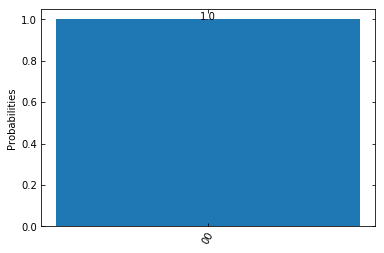

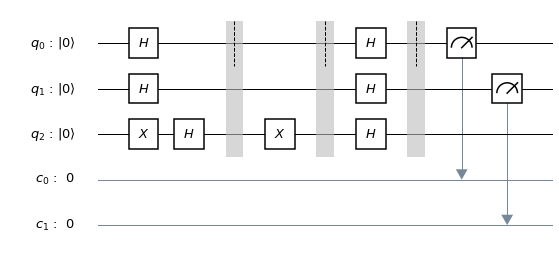

In [3]:
def c_oracle(qci, x0, x1, f_x):
    qci.x(f_x)
    
bn = 3
cn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

qc.x(q[2])
for i in range(bn):
    qc.h(q[i])
qc.barrier()
c_oracle(qc, q[0], q[1], q[2])
qc.barrier()
for i in range(bn):
    qc.h(q[i])
qc.barrier()
for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)

## 5-2: 均等な関数の場合

{'10': 1024}


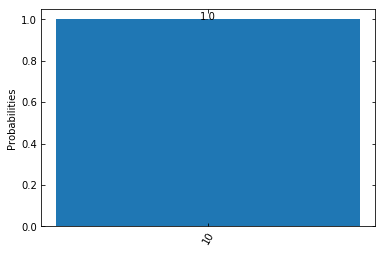

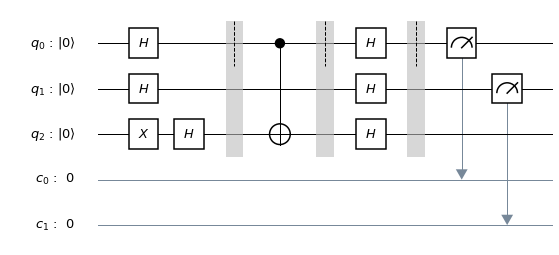

In [4]:
def b_oracle(qci, x0, x1, f_x):
    qci.cx(x0, f_x)
    
bn = 3
cn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

qc.x(q[2])
for i in range(bn):
    qc.h(q[i])
qc.barrier()
b_oracle(qc, q[0], q[1], q[2])
qc.barrier()
for i in range(bn):
    qc.h(q[i])
qc.barrier()
for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)
draw_circuit(qc)